In [20]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import barnard_exact, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [55]:
transplantation_date = pd.to_datetime('2024-02-02')

data = pd.read_csv('data.csv')
data['height_1_date'] = pd.to_datetime(data['height_1_date'], format="%d/%m/%Y")
display(data.head())
display(data.info())

,plant_id,bed_id,bed_type,out_survive,height_1a,height_1b,height_1_date
0,1,A,no-dig,1,70.0,69.0,2024-03-07
1,2,B,dig,1,70.0,77.0,2024-03-07
2,3,A,no-dig,0,NaN,NaN,NaT
3,4,B,dig,1,75.0,75.0,2024-03-07
4,5,C,dig,1,131.0,135.0,2024-03-07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   plant_id       12 non-null     int64         
 1   bed_id         12 non-null     object        
 2   bed_type       12 non-null     object        
 3   out_survive    12 non-null     int64         
 4   height_1a      9 non-null      float64       
 5   height_1b      9 non-null      float64       
 6   height_1_date  9 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 804.0+ bytes


None

# Live to harvest

In [56]:
survival_contingency = pd.crosstab(data.bed_type, data.out_survive)
survival_contingency

out_survive,0,1
bed_type,,
dig,1,5
no-dig,2,4


In [57]:
barnard_exact(survival_contingency, alternative='two-sided', pooled=False, n=32)
# Barnard becuase it is more powerful than Fisher and only one margin is fixed
# unpooled as unknown if variences are the same for each group. Pooling assumes the same varience. https://cran.r-project.org/web/packages/Exact/Exact.pdf , https://stats.stackexchange.com/questions/169864/which-test-for-cross-table-analysis-boschloo-or-barnard

BarnardExactResult(statistic=-0.6974858324629157, pvalue=0.7291618462276042)

In [58]:
barnard_exact([[0,6],[3,3]], alternative='two-sided', pooled=False, n=32)

BarnardExactResult(statistic=-4.242640687119285, pvalue=0.06347656250000001)

## Height

In [63]:
data['height_1_mean'] = (data['height_1a']+data['height_1b'])/2
data['height_1_day'] = data['height_1_date'] - transplantation_date
data['height_1_day_str'] = data['height_1_day'].apply(str)
data

,plant_id,bed_id,bed_type,out_survive,height_1a,height_1b,height_1_date,height_1_mean,height_1_day,height_1_day_str
0,1,A,no-dig,1,70.0,69.0,2024-03-07,69.5,34 days,34 days 00:00:00
1,2,B,dig,1,70.0,77.0,2024-03-07,73.5,34 days,34 days 00:00:00
2,3,A,no-dig,0,NaN,NaN,NaT,NaN,NaT,NaT
3,4,B,dig,1,75.0,75.0,2024-03-07,75.0,34 days,34 days 00:00:00
4,5,C,dig,1,131.0,135.0,2024-03-07,133.0,34 days,34 days 00:00:00
5,6,D,no-dig,0,NaN,NaN,NaT,NaN,NaT,NaT
6,7,C,dig,0,NaN,NaN,NaT,NaN,NaT,NaT
7,8,D,no-dig,1,113.0,114.0,2024-03-07,113.5,34 days,34 days 00:00:00
8,9,E,dig,1,113.0,112.0,2024-03-07,112.5,34 days,34 days 00:00:00
9,10,E,dig,1,70.0,70.0,2024-03-07,70.0,34 days,34 days 00:00:00


c:\Users\acbre\anaconda3\envs\default\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\acbre\anaconda3\envs\default\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


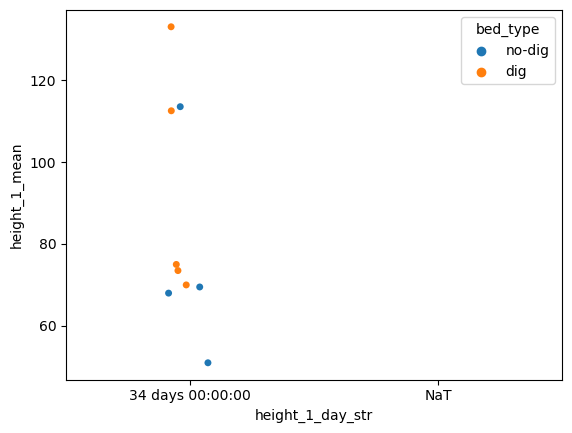

In [66]:
sns.stripplot(data=data, y='height_1_mean', x='height_1_day_str', hue='bed_type', jitter=True)
plt.show()

In [65]:
a = data[((data['bed_type']=='dig')&(data['height_1_mean'].isna()==False))]['height_1_mean']
b = data[((data['bed_type']=='no-dig')&(data['height_1_mean'].isna()==False))]['height_1_mean']
ttest_ind(a=a, b=b, equal_var=True, nan_policy='raise', permutations=None, alternative='two-sided', trim=0)

TtestResult(statistic=0.9328677792620035, pvalue=0.3819387891001678, df=7.0)

In [62]:
data['height_1_date']

0    2024-03-07
1    2024-03-07
2           NaT
3    2024-03-07
4    2024-03-07
5           NaT
6           NaT
7    2024-03-07
8    2024-03-07
9    2024-03-07
10   2024-03-07
11   2024-03-07
Name: height_1_date, dtype: datetime64[ns]